In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from utilities.Dataset import *
import pickle
import sys
from typing import List
import torch
import os

c:\Users\isimic\Anaconda3\envs\ar-egg\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
participant_data_path = './EEG/number'
processed_data_path = './EEG/processed_data'
split_data_path = './EEG/split_data'

In [4]:
ps = os.listdir(participant_data_path)
participants=[]
for p in ps:
    p= p[:3]
    if p not in participants:
        participants.append(p)
        
participants= sorted(participants)
# participants, len(participants)

In [5]:
load_name=f"userfold_data_scaled_p_dictionary-number"
data_dir = "./EEG/split_data/standard_scaled"
try:
    raw_user_fold= pickle.load(open(os.path.join(data_dir, f"{load_name}.pkl"), "rb"))
except:
    print(f"pickle file does not exist. Use EEG-Preprocess.ipynb and EEG-Split.ipynb to save data setting.")
    sys.exit()

In [6]:
from utilities.userfold_framework import *
from Models.AR_EEG_models import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

In [7]:
# from torcheeg.models import EEGNet
# import Models.model_func as Model_Func
# from torch import nn
# from Models.multi_models import *

# DEVICE= torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# learning_rate = 0.00005
# batch_size = 64
# n_epochs = 300
# transpose_channels=True
# participants_dictionary=[]
# # participants_online_dictionary=[]
# participants_grads_dictionary={}
# b_acc_list=[]
# c0_acc_list=[]
# c1_acc_list=[]

# # EPOCH=[
    
# # ]
# for r in range(0,5):
#     print('RUN: ', r)
#     participants_dictionary=[]
#     for i in range(len(participants)):
#         print('    Participant: ', i)

#         train_dataloader, val_dataloader, classes, input_dim, class_ratio= user_fold_load(i,
#                                                                                           raw_user_fold,
#                                                                                           participants,
#                                                                                           batch_size=batch_size,
#                                                                                           transpose_channels=transpose_channels)

#         eegnet= EEGNet(
#             chunk_size=input_dim[1],
#             num_electrodes=input_dim[0],
#             num_classes=classes,
#             kernel_1= 32,
#             kernel_2=32,
#             F1=8,
#             F2=16,
#             dropout=0.5
#         ).to(DEVICE)

#         classifier= LSTM_EEGNet_Wrapper(DEVICE, eegnet, input_dim).to(DEVICE)
#     #     optimizer= torch.optim.RMSprop(classifier.parameters(), lr=learning_rate)
#         optimizer = torch.optim.Adam(classifier.parameters(), lr = learning_rate)


#         criterion= torch.nn.CrossEntropyLoss(weight=torch.tensor(class_ratio, dtype=torch.float).to(DEVICE))
#     #     criterion = nn.NLLLoss(weight=torch.tensor(class_ratio, dtype=torch.float).to(DEVICE))

#         scheduler= torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=2)

#         saved_dir= f"./EEG/saved_models/Userfold/run{r}"
#         model= EEGNet_IE_HP_Wrapper(
#             DEVICE, classifier, input_dim
#         ).to(DEVICE)

# #         train_func= eeg_grad_train
# #         model.training_procedure(iteration=n_epochs,
# #                                  train_dataloader=train_dataloader,
# #                                  val_dataloader=val_dataloader,
# #                                  print_cycle=2,
# #                                  path=f"./dictionary/intermdiate_dicts",
# #                                  loss_func=criterion,
# #                                  optimiser=optimizer, #scheduler=scheduler,
# #                                  train_func=train_func
# #                                 )
# #         if model.epoch == n_epochs+1:
# #             EPOCH= n_epochs
# #         else:
# #             EPOCH= model.epoch

# #         torch.save(model.state_dict(), 
# #                os.path.join(
# #                    saved_dir, f"Userfold-{participants[i]}-LSTM_EEGNet-Grad_Multivariate-e{EPOCH}.pt"
# #                )
# #         )
# #         pickle.dump(model.return_IE_grad(),
# #                     open(
# #                         os.path.join(
# #                             saved_dir, f"Userfold-{participants[i]}-LSTM_EEGNet-Grad_Multivariate-grad_all-e{EPOCH}.pkl"
# #                         ), "wb")
# #         )
#     # OR
#         model.load_state_dict(
#         torch.load(
#             open(
#                 os.path.join(
#                     saved_dir, f"Userfold-{participants[i]}-LSTM_EEGNet-Grad_Multivariate-e{n_epochs}.pt"
#                 ), "rb"
#             )
#                   )
#         )
#         # model.IE_grad= pickle.load(
#         #         open(
#         #             os.path.join(
#         #                 saved_dir, f"Userfold-{participants[i]}-LSTM_EEGNet-Grad_Multivariate-grad_all-e{n_epochs}.pkl"
#         #             ),"rb"
#         #         )
#         #     )


#         prediction, dictionary= model.prediction_procedure(val_dataloader, dict_flag=True)

#         ys= np.concatenate([y.detach().cpu().numpy() for x, y in val_dataloader])

#         c0_acc, c1_acc, b_acc= calculate_accuracy(ys, prediction)
#         print("c0_acc", c0_acc, ", c1_acc", c1_acc, ", b_acc", b_acc)
#         b_acc_list.append(b_acc)
#         c0_acc_list.append(c0_acc)
#         c1_acc_list.append(c1_acc)
#     #     participants_grads_dictionary[participants[i]]= model.return_IE_grad()
#         participants_dictionary.append(dictionary)
#     pickle.dump(participants_dictionary, open(f"{saved_dir}/participant_dictionary-LSTM_EEGNet-Grad_Multivariate.pkl","wb"))
   

# tmp=[]
# for i, dictionary in enumerate(participants_dictionary):
#     print(f"User {participants[i]} f1: {dictionary['weighted avg']['f1-score']} acc: {dictionary['accuracy']}")
#     print(f" c0: {c0_acc_list[i]} c1: {c1_acc_list[i]} bacc: {b_acc_list[i]}")
#     tmp.append(dictionary['weighted avg']['f1-score'])

# print(f"average {np.mean(tmp)}")
# print()
# print(np.array(b_acc_list).mean())
# print(np.array(c1_acc_list).mean())
# print(np.array(c0_acc_list).mean())


---
# XAI
---

In [12]:
from xai_ts_utils import *

parent_save_dir = 'XAI_RESULTS'
DEVICE= torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
channel_names=["AFz","F3","F1","Fz","F2","F4","FC5","FC3","FC1","FCz","FC2",
               "FC4","FC6","C5","C3","C1","Cz","C2","C4","C6","CP5","CP3",
               "CP1","CPz","CP2","CP4","CP6","P3","P1","Pz","P2","P4"]

_, _, classes, input_dim, _= user_fold_load(0,raw_user_fold,participants,batch_size=1000,transpose_channels=True)

start=-0.5
step=1.5/(188-1)
timestep_labels=[]
for i in range(input_dim[1]):
    timestep_labels.append(round(start+step*i,3))

In [9]:
def get_participants_datasets(participant_id, participants, raw_user_fold, train_set = True):
    train_dataloader, val_dataloader, _, _, _= user_fold_load(participant_id,
                                                                raw_user_fold,
                                                                participants,
                                                                batch_size=1000,
                                                                transpose_channels=True)
    
    if train_set:
        dataloader = train_dataloader
    else:
        dataloader = val_dataloader

    # Accumulate data from DataLoader into a list
    data_x = []
    data_y = []
    for batch_x, batch_y in dataloader:
        data_x.append(batch_x.numpy())
        data_y.append(batch_y.numpy())

    # Concatenate or stack the batches if needed
    data_x = np.concatenate(data_x)
    data_y = np.concatenate(data_y)

    return data_x, data_y

# participant_id = 1
# data_x, data_y = get_participants_datasets(participant_id, participants, raw_user_fold, train_set=False)
# data_x.shape, data_y.shape

In [10]:
from torcheeg.models import EEGNet
import Models.model_func as Model_Func
from torch import nn
from Models.multi_models import *

def get_participant_model(run_id, participant_id, classes, input_dim):

    n_epochs = 300 # DO NOT MODIFY!

    DEVICE= torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

    eegnet= EEGNet(
        chunk_size=input_dim[1],
        num_electrodes=input_dim[0],
        num_classes=classes,
        kernel_1= 32,
        kernel_2=32,
        F1=8,
        F2=16,
        dropout=0.5
    ).to(DEVICE)

    classifier= LSTM_EEGNet_Wrapper(DEVICE, eegnet, input_dim).to(DEVICE)

    saved_dir= f"./EEG/saved_models/Userfold/run{run_id}"
    model= EEGNet_IE_HP_Wrapper(DEVICE, classifier, input_dim).to(DEVICE)

    model.load_state_dict(
            torch.load(
                open(
                    os.path.join(
                        saved_dir, f"Userfold-{participants[participant_id]}-LSTM_EEGNet-Grad_Multivariate-e{n_epochs}.pt"
                    ), "rb"
                )
                    )
            )
    return model


---
## mean importance per participant
---

In [ ]:
from xai_ts_utils import *
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import matplotlib
import mne
info= mne.create_info(channel_names, sfreq=500, ch_types=32*["eeg"])
info.set_montage("standard_1020")
##############################

results_time_point_importance = {}
results_channel_importance = {}
results_mean_explanation = {}


run_id = 0
target_class_id = 1 # 0: no error, 1: error

for run_id in range(5): # TODO: Check if iterating over all runs
    run_key = f'run_{run_id}'
    print(run_key)
    results_time_point_importance[run_key] = []
    results_channel_importance[run_key] = []
    results_mean_explanation[run_key] = []
    for i, p_id in enumerate(participants): # TODO: Check if all participants enabled!
        saved_dir = os.path.join(parent_save_dir, f'run_{run_id}', p_id)
        # print('i: ', i)
        print('  p_id: ', p_id)
        p_data_x, p_data_y = get_participants_datasets(i, participants, raw_user_fold, train_set=True)
        # print('successfully loaded participant data!')

        p_model = get_participant_model(run_id, i, classes, input_dim)
        # print('successfully loaded participant model!')

        mean_explanation, time_point_importance, channel_importance = get_xai_summary_per_subset(p_data_x, p_data_y, channel_names, target_class_id, p_id, p_model, saved_dir, DEVICE, xticklabels=timestep_labels)

        p_normalized_mean_explanation = mean_explanation / mean_explanation.max()
        results_mean_explanation[run_key].append(mean_explanation)
        results_time_point_importance[run_key].append({
            'p_id' : p_id,
            'time_point_importance' : time_point_importance,
        })

        results_channel_importance[run_key].append({
            'p_id' : p_id,
            'channel_importance' : channel_importance
        })

        
        ############################### HEAD PLOTS! ###############################
        fig, ax = plt.subplots(figsize=(12, 9)) # Width, height in inches
        minmax_im, _= mne.viz.plot_topomap(
            channel_importance.reshape(-1),
            info,
            ch_type= "eeg",
            sensors=True,
            names=channel_names,
            cmap="Blues",
            axes=ax,
            show=False,
            extrapolate="local"
            #,vlim=(0,1)
        #     sphere=0.09
        )
        
        plt.title(f'{p_id} - class_{target_class_id} - DeepLIFT', fontsize=20, fontweight='bold')
        cbar = plt.colorbar(minmax_im, ax=ax)
        cbar.set_label('Normalized Importance Estimate', labelpad=20, fontsize=18)
        cbar.ax.tick_params(labelsize=14)

        for tt in plt.findobj(fig, matplotlib.text.Text):
            if tt.get_text() in channel_names:
                tt.set_fontsize(14)
        plt.tight_layout()
        plt.gcf().set_facecolor('white')
        plt.savefig(os.path.join(saved_dir, f'channel importance head - {p_id} - class_{target_class_id} - DeepLIFT.png'), bbox_inches='tight')

pickle.dump(results_time_point_importance, open(os.path.join(parent_save_dir, 'results_time_point_importance.pkl'), 'wb'))
pickle.dump(results_channel_importance,    open(os.path.join(parent_save_dir, 'results_channel_importance.pkl'), 'wb'))
pickle.dump(results_mean_explanation,      open(os.path.join(parent_save_dir, 'results_mean_explanation.pkl'), 'wb'))

---
## mean time point / channel importance across runs
---

In [ ]:
results_time_point_importance = pickle.load(open(os.path.join(parent_save_dir, 'results_time_point_importance.pkl'), 'rb'))
results_channel_importance    = pickle.load(open(os.path.join(parent_save_dir, 'results_channel_importance.pkl'), 'rb'))
results_mean_explanation      = pickle.load(open(os.path.join(parent_save_dir, 'results_mean_explanation.pkl'), 'rb'))

### Calculate mean time point importance per run, and plot line chart across all runs including std.

In [ ]:
mean_time_point_importances_over_runs = []
for run_id in results_time_point_importance:
    rows = []
    for res in results_time_point_importance[run_id]:
        row = {
            'participant' : res['p_id']
        }
        for i in range(len(res['time_point_importance'])):
            row[f'{i+1}'] = res['time_point_importance'][i]
        rows.append(row)
    tp_importance_df = pd.DataFrame(rows)

    row = {
        'participant' : 'ALL PARTICIPANTS'
    }
    importance = []
    for i in range(len(res['time_point_importance'])):
        row[f'{i+1}'] = tp_importance_df[f'{i+1}'].mean()
        importance.append(tp_importance_df[f'{i+1}'].mean())
    tp_importance_df = tp_importance_df.append(row, ignore_index=True)
    tp_importance_df.to_csv(os.path.join(parent_save_dir, f'ALL PARTICIPANTS {run_id} - mean time point importance.csv'), index=False)

    # plt.plot(importance) # for inspection
    mean_time_point_importances_over_runs.append(np.array(importance))
mean_time_point_importances_over_runs = np.array(mean_time_point_importances_over_runs)

In [ ]:
dfs=[]
for i, array in enumerate(mean_time_point_importances_over_runs):
    for j in range(len(timestep_labels)):
        dfs.append({
            "Methods":"DeepLIFT",
            "Timestep":timestep_labels[j],
            "Normalised Importance Estimate":array[j],
            "Run":i
        })

#### Generate "DeepLIFT mean time point importance" figure for paper

<Figure size 800x600 with 0 Axes>

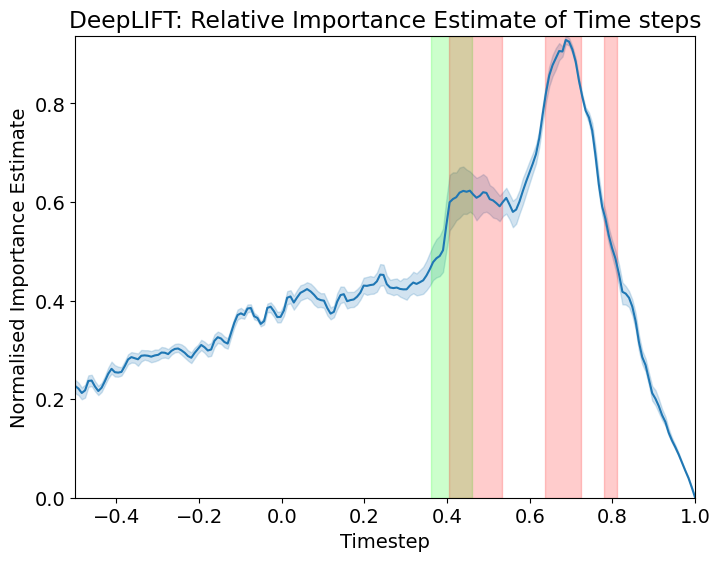

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler
plt.figure(figsize=(8,6))
    
plt.figure(figsize=(8,6))
matplotlib.rcParams.update({"font.size":14})
sns.lineplot(data=pd.DataFrame(dfs),
             x="Timestep",y="Normalised Importance Estimate")

plt.axvspan(0.360,0.460, color="lime", alpha=0.2)
plt.axvspan(0.412,0.532, color="red", alpha=0.2)
plt.axvspan(0.652,0.708, color="red", alpha=0.2)
plt.margins(x=0, y=0)
plt.title("DeepLIFT: Relative Importance Estimate of Time steps")

plt.gcf().set_facecolor('white')
plt.savefig(os.path.join(parent_save_dir, f'mean time point importance across all runs - DeepLIFT.png'), bbox_inches='tight')

### Calculate mean channel importance across all runs, and plot head plot across all runs 

In [61]:
mean_channel_importances_over_runs = []
for run_id in results_channel_importance:
    rows = []
    for res in results_channel_importance[run_id]:
        row = {
            'participant' : res['p_id']
        }
        for i in range(len(channel_names)):
            row[channel_names[i]] = res['channel_importance'][i]
        rows.append(row)
    ch_importance_df = pd.DataFrame(rows)

    row = {
        'participant' : 'ALL PARTICIPANTS'
    }
    importance = []
    for i in range(len(channel_names)):
        row[channel_names[i]] = ch_importance_df[channel_names[i]].mean()
        importance.append(ch_importance_df[channel_names[i]].mean())
    ch_importance_df = ch_importance_df.append(row, ignore_index=True)
    ch_importance_df.to_csv(os.path.join(parent_save_dir, f'ALL PARTICIPANTS {run_id} - mean channel importance.csv'), index=False)
    mean_channel_importances_over_runs.append(np.array(importance))
mean_channel_importances_over_runs = np.array(mean_channel_importances_over_runs)
mean_channel_importances_over_runs.shape

(5, 32)

#### Generate "DeepLIFT mean channel importance" figure for paper

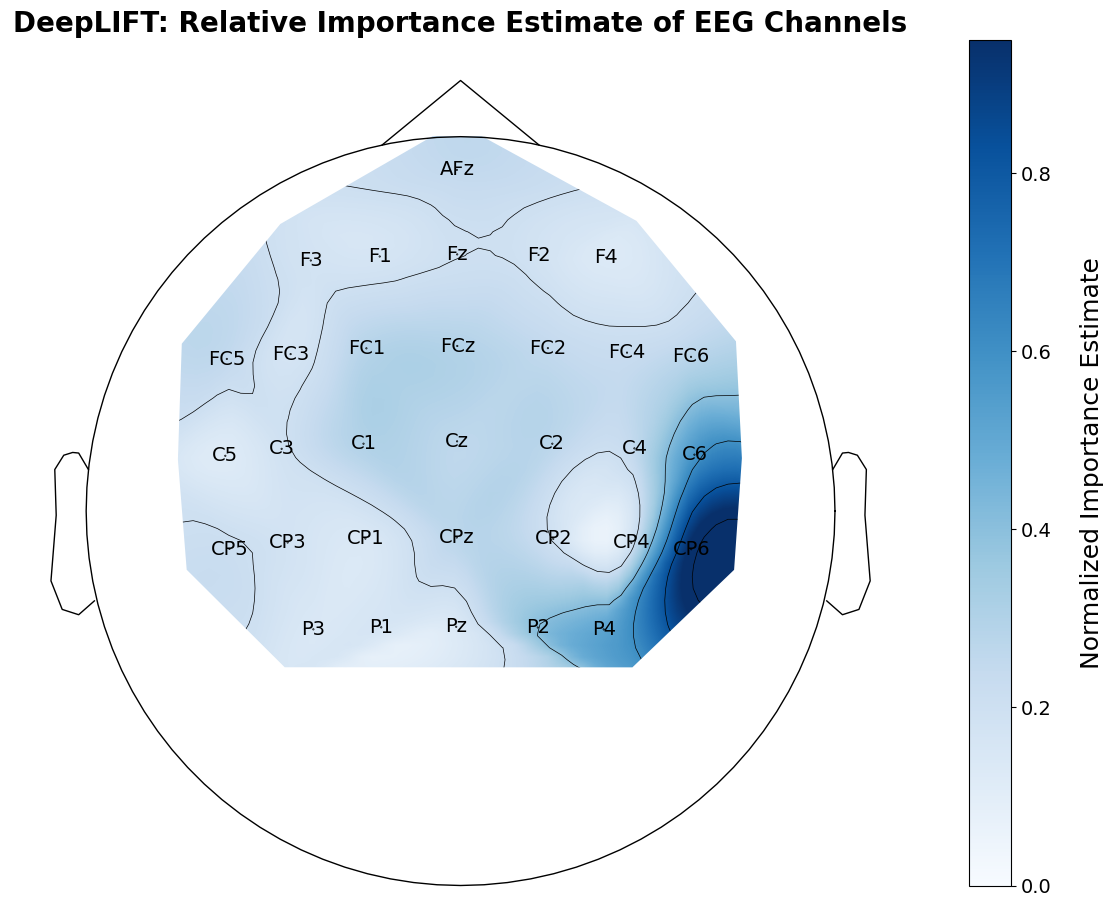

In [ ]:
############################### HEAD PLOTS ###############################
import mne
info= mne.create_info(channel_names, sfreq=500, ch_types=32*["eeg"])
info.set_montage("standard_1020")

fig, ax = plt.subplots(figsize=(12, 9)) # Width, height in inches
minmax_im, _= mne.viz.plot_topomap(
    mean_channel_importances_over_runs.mean(axis=0),
    info,
    ch_type= "eeg",
    sensors=True,
    names=channel_names,
    cmap="Blues",
    axes=ax,
    show=False,
    extrapolate="local"
)

plt.title(f'DeepLIFT: Relative Importance Estimate of EEG Channels', fontsize=20, fontweight='bold')
cbar = plt.colorbar(minmax_im, ax=ax)
cbar.set_label('Normalized Importance Estimate', labelpad=20, fontsize=18)
cbar.ax.tick_params(labelsize=14)

for tt in plt.findobj(fig, matplotlib.text.Text):
    if tt.get_text() in channel_names:
        tt.set_fontsize(14)
plt.tight_layout()
plt.gcf().set_facecolor('white')
plt.savefig(os.path.join(parent_save_dir, f'mean channel importance across all runs - DeepLIFT.png'), bbox_inches='tight')